
# Implementing a neural network which takes MNIST data as input along with a random integer from 0 to 9 with Mnist label as output and also sum of random number and Mnist label in the output

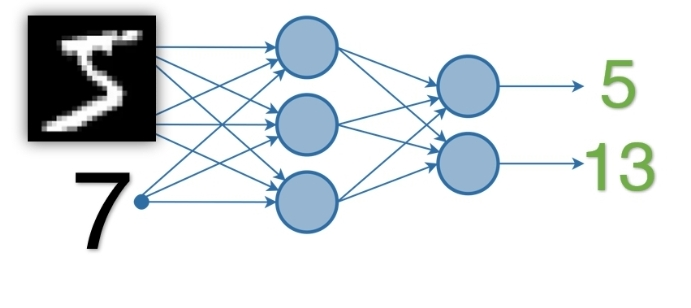



In [7]:

import torch
from torch import nn
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
torch.manual_seed(50)
from torch.nn import functional as F
from torchvision.datasets import MNIST
from typing import Optional, Tuple, Any
torch.set_grad_enabled(True) 
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np



In [8]:

class MNISTRandAdder(MNIST):
    """
    Data merging - MNIST and random number - 
    Add a random number along with the mnist image, and create a new target which is sum of the mnist image's target and the random number
    For example: [MNIST Image for 4], 5 => 4, 9 (labels)

    """

    def __init__( self, *args, **kwargs) -> None:
      
      super(MNISTRandAdder, self).__init__(*args, **kwargs)

    def __getitem__(self, index: int) -> Tuple[Any, Any]:
      
      img, target = super(self.__class__, self).__getitem__(index)
      
      random_number = np.random.randint(low=0, high=10)

      return (img, random_number), (target, target + random_number)

In [5]:
# Load data with modified MNIST data class

train_set = MNISTRandAdder(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)




Extracting ./data/MNISTRandAdder/raw/train-images-idx3-ubyte.gz to ./data/MNISTRandAdder/raw




Extracting ./data/MNISTRandAdder/raw/train-labels-idx1-ubyte.gz to ./data/MNISTRandAdder/raw




Extracting ./data/MNISTRandAdder/raw/t10k-images-idx3-ubyte.gz to ./data/MNISTRandAdder/raw




Extracting ./data/MNISTRandAdder/raw/t10k-labels-idx1-ubyte.gz to ./data/MNISTRandAdder/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [48]:
# There are 4 tensors in the train_set now
# 1 - the mnist image tensor
# 2 - the mnist label tensor
# 3 - the random number tensor
# 4 - the sum of random number and mnist label tensor

train_loader_check = torch.utils.data.DataLoader(train_set, batch_size=1)
print(next(iter(train_loader_check))[0][0].shape)
print(next(iter(train_loader_check))[0][1].shape)
print(next(iter(train_loader_check))[1][0].shape)
print(next(iter(train_loader_check))[1][1].shape)
print(next(iter(train_loader_check)))


torch.Size([1, 1, 28, 28])
torch.Size([1])
torch.Size([1])
torch.Size([1])
[[tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000

# Let's build a network

Below is the basic structure of a Model

In [29]:
class Network_mnist(nn.Module):
    """
    A Basic model for MNIST Digit classification
    INPUT: 1x28x28
    OUTPUT: 20
    Avoding Drop outs as they are patented __/:(\__
    """
    def __init__(self):
        super(__class__, self).__init__()

        dropout_value = 0.1

        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8)
            ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16)
            
        ) # output_size = 24

        # CONVOLUTION BLOCK 2
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(32)
            
        ) # output_size = 22
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(32)
            
        ) # output_size = 20
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(32)
            
        ) # output_size = 18
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 9

        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=9)
        ) # output_size = 1

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=20, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
            
        )

        self.dropout = nn.Dropout(dropout_value)

    def forward(self, t):
        t = self.convblock1(t)
        t = self.convblock2(t)
        t = self.convblock3(t)
        t = self.convblock4(t)
        t = self.convblock5(t)
        t = self.pool1(t)
        t = self.gap(t)        
        t = self.convblock6(t)

        t = t.view(-1, 20)

        return t

In [10]:
# New class to merge MNIST and random number adder network
# Treat the output of random number addition as 19 classes (sum of 0 to 9 - has minimum of 0 and maximum of 18 - which is 19 classes)
# Using cross entropy loss function for both problems
# Treating both problems as multi class classification
# MNIST - problem - 10 classes
# Random number addition problem - 19 classes
# Encode random number into 10 digit binary class using one hot encoding 

class Network_mnist_adder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.mnist_base = Network_mnist()
        
        self.prefinal_layer1 = nn.Sequential(
            nn.Linear(in_features=30, out_features=60, bias=False),
            nn.BatchNorm1d(60),
            nn.ReLU(),
            
        )
        
        self.prefinal_layer2 = nn.Sequential(
            nn.Linear(in_features=60, out_features=60, bias=False),
            nn.BatchNorm1d(60),
            nn.ReLU(),
        )

        # IN: 60 ; OUT: 10
        self.mnist_final_layer = nn.Sequential(
            nn.Linear(in_features=60, out_features=10, bias=False),
        )

        # IN: 60 ; OUT 19 (sum 0 to 18 - total 19 output classes)
        self.adder_final_layer = nn.Sequential(
            nn.Linear(in_features=60, out_features=19, bias=False)
        )


    def forward(self, mnist_img,rand_num):
        
        rand_num = F.one_hot(rand_num, num_classes=10) # Random number generated between 0 and 9 so create one hot encoding with 10 classes
        
        mnist_embed = self.mnist_base(mnist_img)
        
        ccat = torch.cat([mnist_embed, rand_num], dim=-1) # Merge output of MNIST classification and random number input
        
        pre_out = self.prefinal_layer1(ccat)
        pre_out = self.prefinal_layer2(pre_out)

        mnist_out = self.mnist_final_layer(pre_out)       # Use mnist_final layer for mnist classification
        adder_out = self.adder_final_layer(pre_out)       # Use adder_final layer for random number addition classification
        
       
        return mnist_out, adder_out

In [11]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [12]:
len(train_set)

60000

In [30]:
torch.manual_seed(50)

network = Network_mnist_adder()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=45)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(15):

    cumm_total_loss = 0
    total_correct_mnist = 0
    total_correct_rand = 0

    for batch in train_loader: # Get Batch
        (mnist_img, rand_num), (mnist_y, adder_y) = batch 
      
        
        mnist_pred, adder_pred = network(mnist_img, rand_num)
        
        mnist_loss = F.cross_entropy(mnist_pred, mnist_y) # calculate loss for MNIST data classification
        adder_loss = F.cross_entropy(adder_pred, adder_y) # calculate loss for random number addition classification
        
        total_loss = mnist_loss+adder_loss                # adding both losses to get total loss
        
        optimizer.zero_grad()
        total_loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        cumm_total_loss += total_loss.item()

        total_correct_mnist += get_num_correct(mnist_pred, mnist_y)
        total_correct_rand += get_num_correct(adder_pred, adder_y)
        

    print(
        "epoch", epoch, 
        "total_correct_mnist:", total_correct_mnist,
        "total_correct_rand:", total_correct_rand,
        "loss:", cumm_total_loss,
        "accuracy_mnist", total_correct_mnist/len(train_set)*100,
        "accuracy_rand",  total_correct_rand/len(train_set)*100
    )

epoch 0 total_correct_mnist: 54837 total_correct_rand: 51499 loss: 1024.9952298458666 accuracy_mnist 91.39500000000001 accuracy_rand 85.83166666666666
epoch 1 total_correct_mnist: 57882 total_correct_rand: 57591 loss: 369.4156039985828 accuracy_mnist 96.47 accuracy_rand 95.985
epoch 2 total_correct_mnist: 58299 total_correct_rand: 58072 loss: 288.5003931806423 accuracy_mnist 97.165 accuracy_rand 96.78666666666666
epoch 3 total_correct_mnist: 58595 total_correct_rand: 58361 loss: 241.3175893544685 accuracy_mnist 97.65833333333333 accuracy_rand 97.26833333333333
epoch 4 total_correct_mnist: 58766 total_correct_rand: 58561 loss: 214.06224502134137 accuracy_mnist 97.94333333333334 accuracy_rand 97.60166666666666
epoch 5 total_correct_mnist: 58906 total_correct_rand: 58716 loss: 190.43509793048725 accuracy_mnist 98.17666666666666 accuracy_rand 97.86
epoch 6 total_correct_mnist: 58993 total_correct_rand: 58833 loss: 172.46417620457942 accuracy_mnist 98.32166666666666 accuracy_rand 98.055
epo

In [32]:
test_set = MNISTRandAdder(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)



test_loader = torch.utils.data.DataLoader(test_set, batch_size=10000)

In [33]:
(mnist_img_t, rand_num_t), (mnist_y_t, adder_y_t) = next(iter(test_loader))

In [34]:
print(rand_num_t.shape)
print(mnist_y_t.shape),
print(adder_y_t.shape)

torch.Size([10000])
torch.Size([10000])
torch.Size([10000])


In [35]:
mnist_pred_t, adder_pred_t = network(mnist_img_t, rand_num_t)
    
mnist_pred_correct_t=get_num_correct(mnist_pred_t, mnist_y_t)
adder_pred_correct_t=get_num_correct(adder_pred_t, adder_y_t)


test_accuracy_mnist_img = mnist_pred_correct_t/ len(test_set)
test_accuracy_adder_pred = adder_pred_correct_t/ len(test_set)
print(test_accuracy_mnist_img,test_accuracy_adder_pred)

0.989 0.9885
